In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/0-Pusan-2023-AO_16_K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.tif"

#------ Coordinates filtering function
args.txt_path = None

args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_Aux.xml"


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.5
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0109.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0109_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0109_Scatter.png")

args.csv_output = args.img_path.replace(".png","_v1_0109.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0109.csv")
args.csv_output_scatter = args.img_path.replace(".png","scatter_v1_0109.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv 

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = True
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS
time :  2023 10 28 13 33
202310281300_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202310281300_dynamic.csv
#------------------ : csv exists


In [192]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1013800800 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [193]:
img_.size

(36700, 27624)

In [194]:
!nvidia-smi

Wed Dec 20 15:14:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:3B:00.0 Off |                  N/A |
|  0%   34C    P8              31W / 350W |   3137MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Model Inference

In [195]:
import testModule

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: /mnt/hdd/eric/.tmp_ipy/00.Checkpoint/ship_tmp/epoch_9.pth
model to device #-----------------------------# :  cuda:0
#------------------- init detection
inference_detector_by_patches GPU ! :  cuda:0


/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


KeyboardInterrupt: 

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [ ]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [ ]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-10-02 10:50:00
now :  2023-10-02 10:55:00
late :  2023-10-02 11:00:00


In [ ]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [ ]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [ ]:
df

,mmsi_,time,long,lat,heading_,turn_,speed_
0,273354130,2023-10-02 10:00:00,129.065333,35.097747,27,-128.0,0.0
1,372435000,2023-10-02 10:00:00,129.058965,35.048002,299,0.0,0.0
2,373493000,2023-10-02 10:00:00,129.069095,35.110647,36,-0.0,0.0
3,440005700,2023-10-02 10:00:00,129.049708,35.120150,511,-128.0,0.0
4,440191390,2023-10-02 10:00:00,129.190807,35.094910,511,-128.0,9.0
...,...,...,...,...,...,...,...
32873,440187980,2023-10-02 10:59:59,129.036890,35.068082,511,-128.0,0.0
32874,440197030,2023-10-02 10:59:59,129.093812,35.108155,329,-1.0,0.1
32875,440200060,2023-10-02 10:59:59,129.066233,35.109067,147,-128.0,0.0
32876,440141630,2023-10-02 10:59:59,129.049518,35.120772,121,0.0,3.5


In [ ]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [ ]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
27430,477110900,2023-10-02 10:50:01,129.164120,34.917450,313,0.0,0.5,2023-10-02 10:50:01
27431,563157400,2023-10-02 10:50:01,129.225230,34.946408,63,4.0,2.5,2023-10-02 10:50:01
27432,440101026,2023-10-02 10:50:01,129.078828,35.083117,242,0.0,0.1,2023-10-02 10:50:01
27433,440076080,2023-10-02 10:50:01,129.308450,35.136600,239,0.0,10.3,2023-10-02 10:50:01
27434,440065110,2023-10-02 10:50:01,129.037060,35.067438,511,-128.0,0.3,2023-10-02 10:50:01
...,...,...,...,...,...,...,...,...
32873,440187980,2023-10-02 10:59:59,129.036890,35.068082,511,-128.0,0.0,2023-10-02 10:59:59
32874,440197030,2023-10-02 10:59:59,129.093812,35.108155,329,-1.0,0.1,2023-10-02 10:59:59
32875,440200060,2023-10-02 10:59:59,129.066233,35.109067,147,-128.0,0.0,2023-10-02 10:59:59
32876,440141630,2023-10-02 10:59:59,129.049518,35.120772,121,0.0,3.5,2023-10-02 10:59:59


# 3. Coordinates filtering


In [ ]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

129.205998 129.370802 35.140868 35.2243202


In [ ]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [ ]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
27480,440600580,2023-10-02 10:50:05,129.328903,35.186470,220,-127.0,30.0,2023-10-02 10:50:05
27513,440312990,2023-10-02 10:50:09,129.217693,35.148845,36,0.0,11.5,2023-10-02 10:50:09
27736,440122550,2023-10-02 10:50:31,129.243300,35.180723,511,-128.0,10.8,2023-10-02 10:50:31
27950,440149710,2023-10-02 10:50:50,129.222508,35.144800,511,-128.0,2.7,2023-10-02 10:50:50
28110,440600580,2023-10-02 10:51:05,129.322387,35.179895,217,-127.0,30.7,2023-10-02 10:51:05
...,...,...,...,...,...,...,...,...
32706,441432000,2023-10-02 10:59:44,129.265487,35.147028,35,0.0,15.0,2023-10-02 10:59:44
32767,440103890,2023-10-02 10:59:50,129.252082,35.187862,511,-128.0,5.7,2023-10-02 10:59:50
32769,440106640,2023-10-02 10:59:50,129.245748,35.156042,511,-128.0,4.9,2023-10-02 10:59:50
32793,440110750,2023-10-02 10:59:51,129.220195,35.150795,511,-128.0,12.1,2023-10-02 10:59:51


In [ ]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


<ipython-input-166-06a44a921bcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
<ipython-input-166-06a44a921bcb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
<ipython-input-166-06a44a921bcb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_duplicates(i

In [ ]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [ ]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,440600580,2023-10-02 10:50:05,129.328903,35.186470,220,-127.0,30.0,2023-10-02 10:50:05,"(529944.7527768813, 3893771.7240973637, 52, N)","(13424, 22457)"
1,440312990,2023-10-02 10:50:09,129.217693,35.148845,36,0.0,11.5,2023-10-02 10:50:09,"(519828.82353671914, 3889571.2985258736, 52, N)","(21825, 2225)"
2,440122550,2023-10-02 10:50:31,129.243300,35.180723,511,-128.0,10.8,2023-10-02 10:50:31,"(522152.6258879581, 3893111.956606976, 52, N)","(14743, 6873)"
3,440149710,2023-10-02 10:50:50,129.222508,35.144800,511,-128.0,2.7,2023-10-02 10:50:50,"(520268.4071084777, 3889123.681319575, 52, N)","(22720, 3104)"
4,440600580,2023-10-02 10:51:05,129.322387,35.179895,217,-127.0,30.7,2023-10-02 10:51:05,"(529353.8698299672, 3893040.6126442337, 52, N)","(14886, 21275)"
...,...,...,...,...,...,...,...,...,...,...
72,441432000,2023-10-02 10:59:44,129.265487,35.147028,35,0.0,15.0,2023-10-02 10:59:44,"(524182.74353487097, 3889380.3622565023, 52, N)","(22207, 10933)"
73,440103890,2023-10-02 10:59:50,129.252082,35.187862,511,-128.0,5.7,2023-10-02 10:59:50,"(522950.2274087142, 3893905.662905261, 52, N)","(13156, 8468)"
74,440106640,2023-10-02 10:59:50,129.245748,35.156042,511,-128.0,4.9,2023-10-02 10:59:50,"(522382.28030739573, 3890375.390911967, 52, N)","(20217, 7332)"
75,440110750,2023-10-02 10:59:51,129.220195,35.150795,511,-128.0,12.1,2023-10-02 10:59:51,"(520056.2430613097, 3889788.0533700134, 52, N)","(21391, 2680)"


In [ ]:
q_df.to_csv(args.csv_output_scatter,index=False)

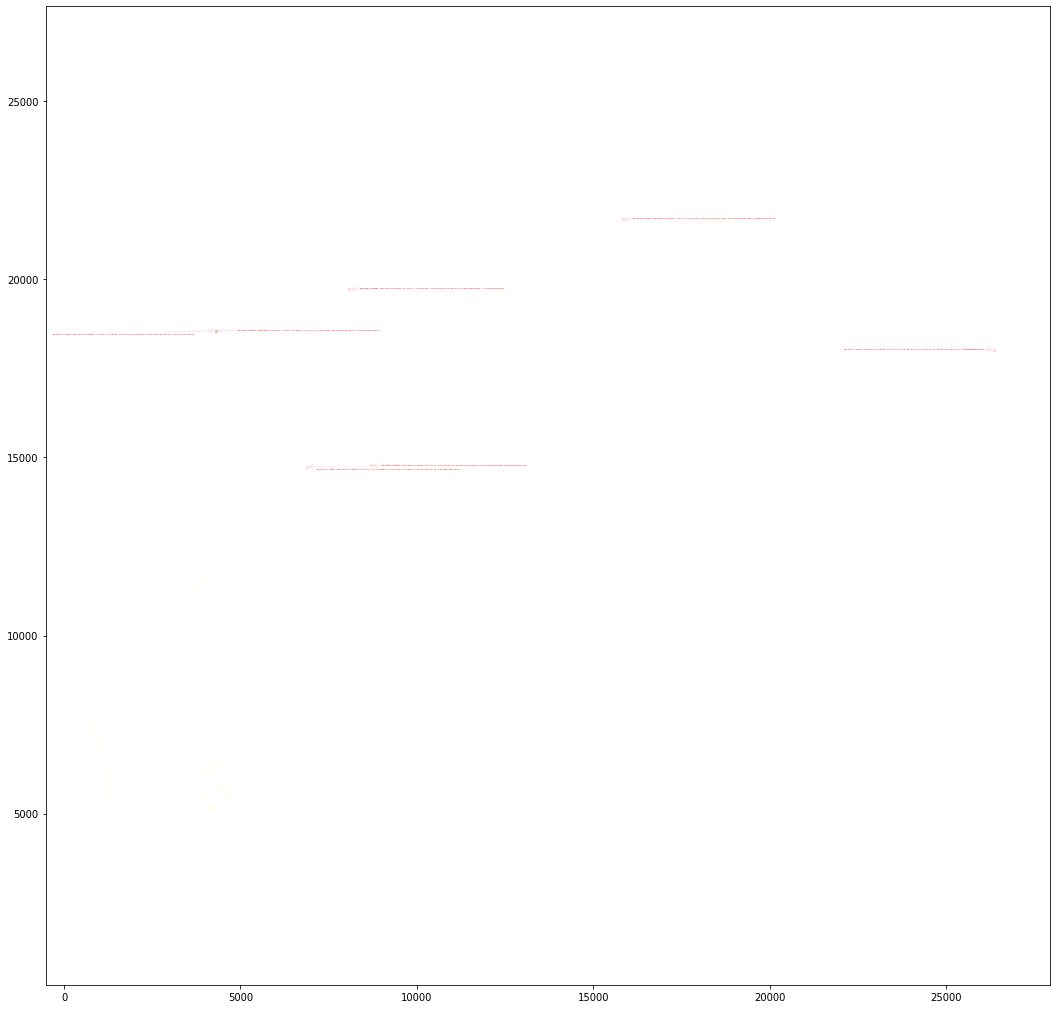

In [ ]:
#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
time_ais = [i[1:-1] for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    #plt.savefig(args.img_output,dpi =1200 )
    plt.show()

In [ ]:
M_

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,26522.806641,17990.464844,262.008942,51.298306,0.248208,0.998477,356481000.0,105.0,0.0,0.5,26365,18024,35.165670,129.350277,023-10-02 10:51:3
1,23,7024.482910,14762.349609,30.024515,10.071168,-1.167788,0.944339,440122550.0,511.0,-128.0,10.8,6873,14743,35.180723,129.243300,023-10-02 10:50:3
2,29,8257.303711,19619.230469,26.857403,10.156816,-1.046059,0.930936,440106640.0,511.0,-128.0,4.0,8084,19726,35.158243,129.249882,023-10-02 10:56:5
3,43,4361.914062,18554.216797,124.692696,23.508621,-1.028710,0.901509,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4
4,58,8668.269531,14602.060547,14.941326,9.923876,-1.560672,0.859161,440103890.0,511.0,-128.0,5.7,8695,14774,35.180565,129.253305,023-10-02 10:55:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,4076.090820,6185.416992,184.297119,31.105425,-0.616431,0.522650,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
145,145,3915.819092,11491.916016,19.108774,6.754956,0.403343,0.521521,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
146,146,4484.260254,5197.469238,24.226524,6.307145,-0.902495,0.519482,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
147,147,3243.534424,7474.833984,17.701742,6.472270,-1.252228,0.517963,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [ ]:
M_.to_csv(args.csv_output)
M_[0:10]

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,26522.806641,17990.464844,262.008942,51.298306,0.248208,0.998477,356481000.0,105.0,0.0,0.5,26365,18024,35.165670,129.350277,023-10-02 10:51:3
1,23,7024.482910,14762.349609,30.024515,10.071168,-1.167788,0.944339,440122550.0,511.0,-128.0,10.8,6873,14743,35.180723,129.243300,023-10-02 10:50:3
2,29,8257.303711,19619.230469,26.857403,10.156816,-1.046059,0.930936,440106640.0,511.0,-128.0,4.0,8084,19726,35.158243,129.249882,023-10-02 10:56:5
3,43,4361.914062,18554.216797,124.692696,23.508621,-1.028710,0.901509,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4
4,58,8668.269531,14602.060547,14.941326,9.923876,-1.560672,0.859161,440103890.0,511.0,-128.0,5.7,8695,14774,35.180565,129.253305,023-10-02 10:55:1
5,68,15796.244141,21846.761719,87.745270,23.790434,-0.952160,0.838844,440600580.0,218.0,0.0,30.6,15837,21693,35.149282,129.292413,023-10-02 10:55:4
6,115,4332.664062,18558.998047,107.656090,26.687603,-1.005696,0.642727,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4
7,0,4814.809570,6040.533691,136.403183,22.931326,0.135331,0.998882,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
8,2,4672.844727,6012.628418,129.269424,21.872900,0.264458,0.998351,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
9,3,5135.695312,6104.837402,152.311859,29.103018,0.202585,0.998192,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [ ]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,440600580,2023-10-02 10:50:05,129.328903,35.186470,220,-127.0,30.0,2023-10-02 10:50:05,"(529944.7527768813, 3893771.7240973637, 52, N)","(13424, 22457)"
1,440312990,2023-10-02 10:50:09,129.217693,35.148845,36,0.0,11.5,2023-10-02 10:50:09,"(519828.82353671914, 3889571.2985258736, 52, N)","(21825, 2225)"
2,440122550,2023-10-02 10:50:31,129.243300,35.180723,511,-128.0,10.8,2023-10-02 10:50:31,"(522152.6258879581, 3893111.956606976, 52, N)","(14743, 6873)"
3,440149710,2023-10-02 10:50:50,129.222508,35.144800,511,-128.0,2.7,2023-10-02 10:50:50,"(520268.4071084777, 3889123.681319575, 52, N)","(22720, 3104)"
4,440600580,2023-10-02 10:51:05,129.322387,35.179895,217,-127.0,30.7,2023-10-02 10:51:05,"(529353.8698299672, 3893040.6126442337, 52, N)","(14886, 21275)"
...,...,...,...,...,...,...,...,...,...,...
72,441432000,2023-10-02 10:59:44,129.265487,35.147028,35,0.0,15.0,2023-10-02 10:59:44,"(524182.74353487097, 3889380.3622565023, 52, N)","(22207, 10933)"
73,440103890,2023-10-02 10:59:50,129.252082,35.187862,511,-128.0,5.7,2023-10-02 10:59:50,"(522950.2274087142, 3893905.662905261, 52, N)","(13156, 8468)"
74,440106640,2023-10-02 10:59:50,129.245748,35.156042,511,-128.0,4.9,2023-10-02 10:59:50,"(522382.28030739573, 3890375.390911967, 52, N)","(20217, 7332)"
75,440110750,2023-10-02 10:59:51,129.220195,35.150795,511,-128.0,12.1,2023-10-02 10:59:51,"(520056.2430613097, 3889788.0533700134, 52, N)","(21391, 2680)"


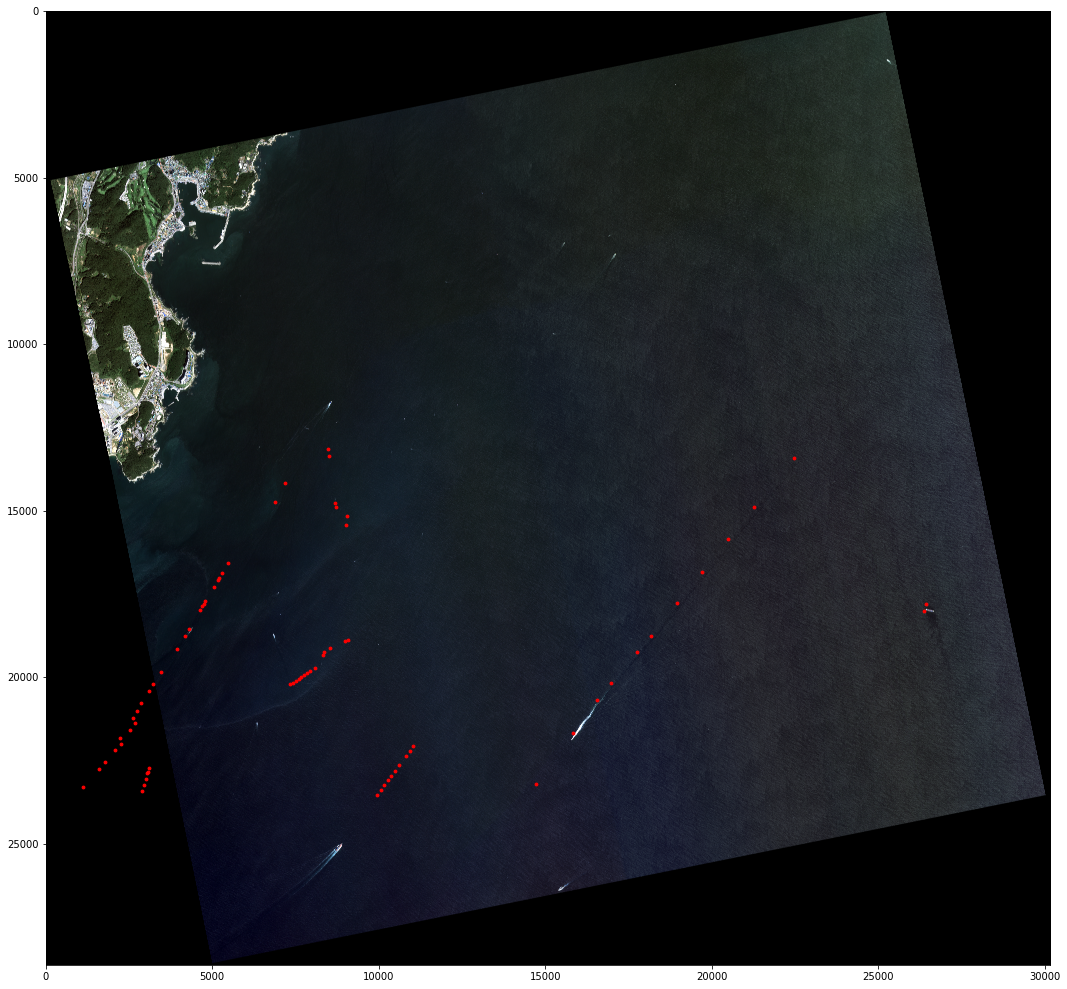

In [ ]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [ ]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

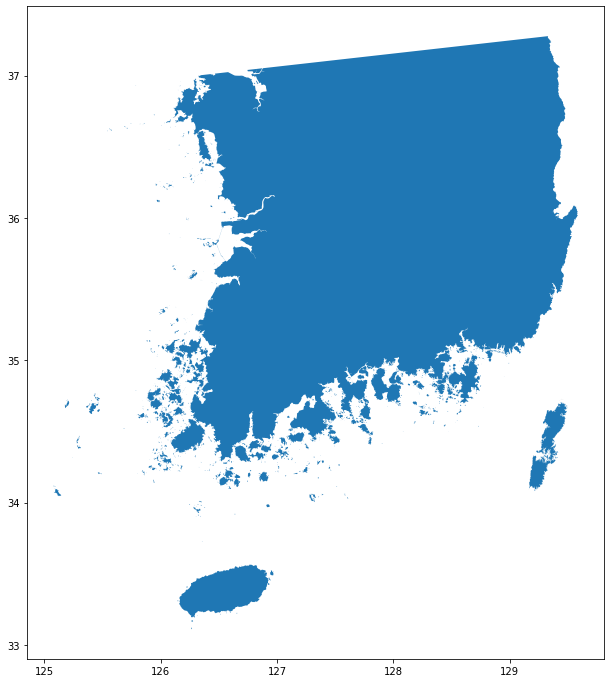

In [ ]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  149
progress :  1  /  149
progress :  2  /  149
progress :  3  /  149
progress :  4  /  149
progress :  5  /  149
progress :  6  /  149
progress :  7  /  149
progress :  8  /  149
progress :  9  /  149
progress :  10  /  149
progress :  11  /  149
progress :  12  /  149
progress :  13  /  149
progress :  14  /  149
progress :  15  /  149
progress :  16  /  149
progress :  17  /  149
progress :  18  /  149
progress :  19  /  149
progress :  20  /  149
progress :  21  /  149
progress :  22  /  149
progress :  23  /  149
progress :  24  /  149
progress :  25  /  149
progress :  26  /  149
progress :  27  /  149
progress :  28  /  149
progress :  29  /  149
progress :  30  /  149
progress :  31  /  149
progress :  32  /  149
progress :  33  /  149
progress :  34  /  149
progress :  35  /  149
progress :  36  /  149
progress :  37  /  149
progress :  38  /  149
progress :  39  /  149
progress :  40  /  149
progress :  41  /  149
progress :  42  /  149
progress :  43  /  14

In [ ]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

,box index,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1,26522.806641,17990.464844,262.008942,51.298306,0.248208,0.998477,356481000.0,105.0,0.0,0.5,26365,18024,35.165670,129.350277,023-10-02 10:51:3
1,23,7024.482910,14762.349609,30.024515,10.071168,-1.167788,0.944339,440122550.0,511.0,-128.0,10.8,6873,14743,35.180723,129.243300,023-10-02 10:50:3
2,29,8257.303711,19619.230469,26.857403,10.156816,-1.046059,0.930936,440106640.0,511.0,-128.0,4.0,8084,19726,35.158243,129.249882,023-10-02 10:56:5
3,43,4361.914062,18554.216797,124.692696,23.508621,-1.028710,0.901509,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4
4,58,8668.269531,14602.060547,14.941326,9.923876,-1.560672,0.859161,440103890.0,511.0,-128.0,5.7,8695,14774,35.180565,129.253305,023-10-02 10:55:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,4076.090820,6185.416992,184.297119,31.105425,-0.616431,0.522650,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
145,145,3915.819092,11491.916016,19.108774,6.754956,0.403343,0.521521,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
146,146,4484.260254,5197.469238,24.226524,6.307145,-0.902495,0.519482,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0
147,147,3243.534424,7474.833984,17.701742,6.472270,-1.252228,0.517963,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0


In [ ]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

<ipython-input-179-cf347b00db9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_masked['box index'] = [i for i in range(len(M_masked))]


,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time,box index
0,26522.806641,17990.464844,262.008942,51.298306,0.248208,0.998477,356481000.0,105.0,0.0,0.5,26365,18024,35.165670,129.350277,023-10-02 10:51:3,0
1,7024.482910,14762.349609,30.024515,10.071168,-1.167788,0.944339,440122550.0,511.0,-128.0,10.8,6873,14743,35.180723,129.243300,023-10-02 10:50:3,1
2,8257.303711,19619.230469,26.857403,10.156816,-1.046059,0.930936,440106640.0,511.0,-128.0,4.0,8084,19726,35.158243,129.249882,023-10-02 10:56:5,2
3,4361.914062,18554.216797,124.692696,23.508621,-1.028710,0.901509,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4,3
4,8668.269531,14602.060547,14.941326,9.923876,-1.560672,0.859161,440103890.0,511.0,-128.0,5.7,8695,14774,35.180565,129.253305,023-10-02 10:55:1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,3977.201416,6999.692871,55.501896,25.908354,1.494848,0.593255,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,70
71,3873.089844,11615.195312,33.504318,16.499765,0.187588,0.558492,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,71
72,4076.090820,6185.416992,184.297119,31.105425,-0.616431,0.522650,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,72
73,3915.819092,11491.916016,19.108774,6.754956,0.403343,0.521521,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,73


# Masked Visualization

#-------------- 0.0133
#-------------- 0.0267
#-------------- 0.0400
#-------------- 0.0533
#-------------- 0.0667
#-------------- 0.0800
#-------------- 0.0933
#-------------- 0.1067
#-------------- 0.1200
#-------------- 0.1333
#-------------- 0.1467
#-------------- 0.1600
#-------------- 0.1733
#-------------- 0.1867
#-------------- 0.2000
#-------------- 0.2133
#-------------- 0.2267
#-------------- 0.2400
#-------------- 0.2533
#-------------- 0.2667
#-------------- 0.2800
#-------------- 0.2933
#-------------- 0.3067
#-------------- 0.3200
#-------------- 0.3333
#-------------- 0.3467
#-------------- 0.3600
#-------------- 0.3733
#-------------- 0.3867
#-------------- 0.4000
#-------------- 0.4133
#-------------- 0.4267
#-------------- 0.4400
#-------------- 0.4533
#-------------- 0.4667
#-------------- 0.4800
#-------------- 0.4933
#-------------- 0.5067
#-------------- 0.5200
#-------------- 0.5333
#-------------- 0.5467
#-------------- 0.5600
#-------------- 0.5733
#----------

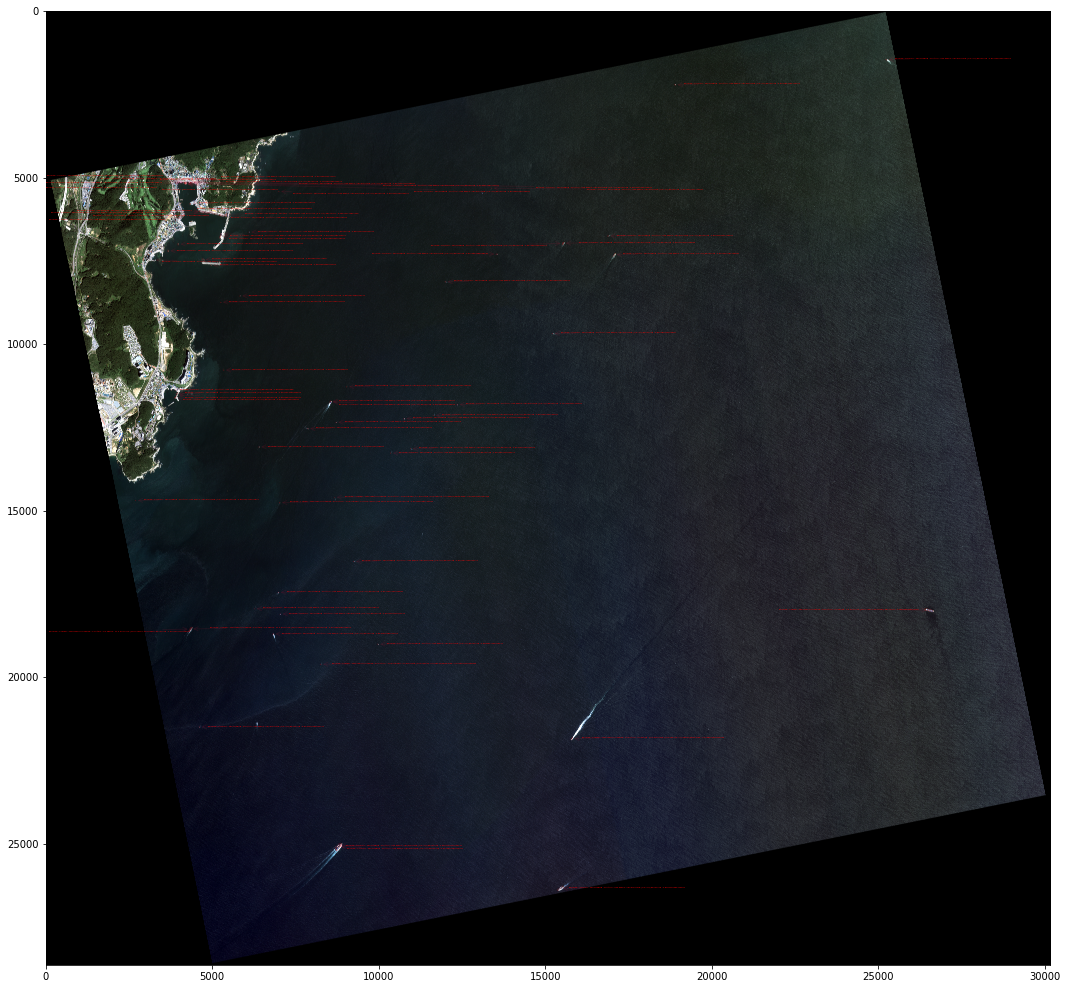

In [ ]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

# Extract Chips

In [ ]:
#----- load 
img_path = args.img_path
M_chip = pd.read_csv(args.csv_output_masked)

img_part = Image.open(img_path)
prefix_ = args.img_path.split("/")[-1].replace(".png","")

a= os.path.dirname(args.img_path)
chip_folder = os.path.join(a,"chips")

if os.path.exists(chip_folder):
    print("folder exists")
else:
    os.mkdir(chip_folder)
    print("folder created")

folder created


In [ ]:
M_chip

,Unnamed: 0,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,bbox prob,mmsi,heading,turn,speed,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time,box index
0,0,26522.8070,17990.465,262.008940,51.298306,0.248208,0.998477,356481000.0,105.0,0.0,0.5,26365,18024,35.165670,129.350277,023-10-02 10:51:3,0
1,1,7024.4830,14762.350,30.024515,10.071168,-1.167788,0.944339,440122550.0,511.0,-128.0,10.8,6873,14743,35.180723,129.243300,023-10-02 10:50:3,1
2,2,8257.3040,19619.230,26.857403,10.156816,-1.046059,0.930936,440106640.0,511.0,-128.0,4.0,8084,19726,35.158243,129.249882,023-10-02 10:56:5,2
3,3,4361.9140,18554.217,124.692696,23.508621,-1.028711,0.901509,440312990.0,34.0,0.0,11.0,4308,18556,35.163562,129.229165,023-10-02 10:55:4,3
4,4,8668.2700,14602.061,14.941326,9.923876,-1.560672,0.859161,440103890.0,511.0,-128.0,5.7,8695,14774,35.180565,129.253305,023-10-02 10:55:1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,3977.2014,6999.693,55.501896,25.908354,1.494848,0.593255,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,70
71,71,3873.0898,11615.195,33.504320,16.499765,0.187588,0.558492,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,71
72,72,4076.0908,6185.417,184.297120,31.105425,-0.616431,0.522650,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,72
73,73,3915.8190,11491.916,19.108774,6.754956,0.403343,0.521521,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0,73


In [ ]:
prefix_

'0-Pusan-2023-AO_9_C1_20231002015544_14047_00028701_L1G_PS'

#-------------------- 149
{0}
{1}
{2}
{3}
{4}
{5}
{6}


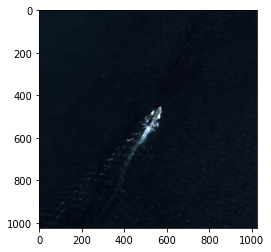

In [ ]:

print("#--------------------",len(M_))
for i,row in M_chip.iterrows():

    if row["ais time"] != str(0):
        print({i})
        box_ = row
        x = box_["bbox x coord"]
        y = box_["bbox y coord"]
        width =  box_["bbox width"]
        height = box_["bbox height"]
        angle_ = box_["bbox angle"]
        box_idx = box_['box index']

        pixel_slice = 512
        a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
        #plt.figure(figsize=(18,18))
        
        folder_ = chip_folder
        saved_name = f"{box_idx}_{prefix_}.png"
        
        
        #plt.figure(figsize=(18,18))
        #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
        a_.save(os.path.join(folder_,saved_name))
        plt.imshow(a_)
    

In [ ]:
import subprocess


zip_command = ["zip", "-jr","chips_v2.zip", folder_]

try:    
    subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
    print("Zip operation successful.")
except subprocess.CalledProcessError as e:
    print(f"Error during zip operation: {e}")

Zip operation successful.
